evalf() is a method from the SymPy library, and it plays an important role when you want numerical (decimal) results instead of symbolic ones.evalf() is a method from the SymPy library, and it plays an important role when you want numerical (decimal) results instead of symbolic ones.
Without evalf(): SymPy expressions remain in symbolic form (like pi, e, square roots, fractions, etc.).

Tanget to r2 will be:
 [0.50000
 -0.13534
 12.00000]
Tanget to r2 will be:
 [-5.44140
 3.14159
 3.00000]
Vector parallel to the line of intersection is: [14  2 15]


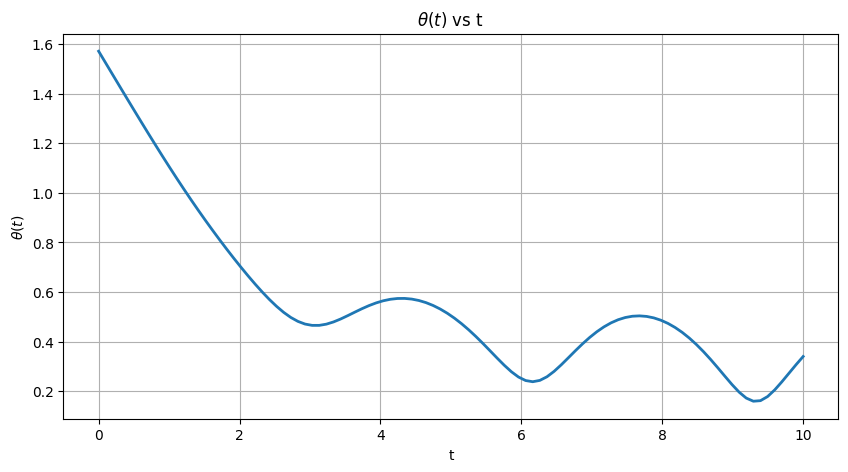

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import math

t = sp.symbols('t')
r1 = sp.Matrix([sp.ln(t),sp.exp(-t),t**3])
r2 = sp.Matrix([2*sp.cos(sp.pi*t),2*sp.sin(sp.pi*t),3*t])

v1 = r1.diff(t).subs(t,2).evalf()
v2 = r2.diff(t).subs(t,1/3).evalf()

print("Tanget to r2 will be:" + "\n " + "[" + "\n ".join(f"{x:.5f}" for x in v1) + "]")
print("Tanget to r2 will be:" + "\n "+ "[" + "\n ".join(f"{x:.5f}" for x in v2) +"]")

#separator.join(iterable_of_strings) Here the separator can be \n or , ... followed by a iterable of strings.

# Finding vector parallel to the intersection of the two planes

n1 = np.array([3,-6,-2])
n2 = np.array([2,1,-2])
v = np.cross(n1,n2)
print(f"Vector parallel to the line of intersection is: {v}")

# Finding the velocity and acceleration of the vector r(t)
r3 = sp.Matrix([3*t,sp.sin(t),t**2])
v3 = r3.diff(t)
a3 = v3.diff(t)

theta = sp.acos(v3.dot(a3)/(v3.norm()*a3.norm()))
theta_func = sp.lambdify(t,theta,'numpy') 

#lambdify(args, expr, modules='numpy')
#converts symbolic expressions into fast, callable Python functions for numerical computation.

t_vals = np.linspace(0,10,100)
theta_vals = theta_func(t_vals)
plt.figure(figsize=(10, 5))
plt.plot(t_vals,theta_vals,linewidth=2)
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')
plt.title(r'$\theta(t)$ vs t')
plt.grid(True)
plt.show()

How the join function works

In [5]:
# # Example 1: Basic join with a list of strings
# words = ["Hello", "World"]
# result = " ".join(words)
# print(result)  # Output: "Hello World"


In [6]:
v1

Matrix([
[               0.5],
[-0.135335283236613],
[              12.0]])

In [5]:
v2

Matrix([
[-5.44139809270265],
[ 3.14159265358979],
[              3.0]])

float64


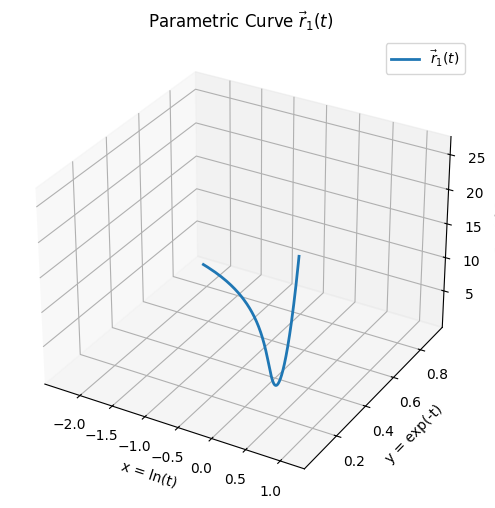

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D

# Define the parametric curve
t = sp.symbols('t')
r1 = sp.Matrix([sp.ln(t), sp.exp(-t), t**3])

# Lambdify the entire vector at once
r1_func = sp.lambdify(t, r1, "numpy")

# Generate t values and compute points
t_vals = np.linspace(0.1, 3, 300)
points = r1_func(t_vals)

# Reshape to get correct form for plotting
# We want to transform from (3, 1, 300) to (300, 3)

x_vals = points[0, 0, :]  # Extract x values
y_vals = points[1, 0, :]  # Extract y values
z_vals = points[2, 0, :]  # Extract z values

# Plot in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_vals, y_vals, z_vals, 
        label=r'$\vec{r}_1(t)$', lw=2)

# Set labels and title
ax.set(xlabel='x = ln(t)', ylabel='y = exp(-t)', zlabel='z = t^3',
       title='Parametric Curve $\\vec{r}_1(t)$')
ax.legend()
plt.show()

(300, 3, 1)
float64


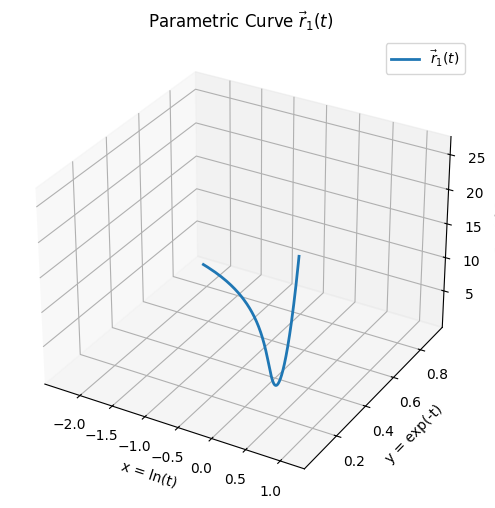

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D

# Define the parametric curve
t = sp.symbols('t')
r1 = sp.Matrix([sp.ln(t), sp.exp(-t), t**3])

# Lambdify the entire vector at once
r1_func = sp.lambdify(t, r1, "numpy")

# Generate t values and compute points
t_vals = np.linspace(0.1, 3, 300)
points = np.array([r1_func(t_val) for t_val in t_vals])

print(points.shape)  # Should be (300, 3)
print(points.dtype)

# Plot in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(points[:, 0], points[:, 1], points[:, 2], 
        label=r'$\vec{r}_1(t)$', lw=2)

# Set labels and title
ax.set(xlabel='x = ln(t)', ylabel='y = exp(-t)', zlabel='z = t^3',
       title='Parametric Curve $\\vec{r}_1(t)$')
ax.legend()
plt.show()